In [1]:
#https://medium.com/@tballz/market-regime-detection-and-prediction-lesson-3-prediction-via-supervised-learning-methods-16646428e602
import yfinance as yf
import datetime
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import Stock_quant.ATR
from ta.volatility import AverageTrueRange
#import Stock_quant.wwma
from ta.trend import WMAIndicator
from ta.volume import VolumeWeightedAveragePrice
from sklearn.mixture import GaussianMixture
import sklearn.metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(r'D:/Downloads/df_regime.csv')
df_replace = pd.read_csv(r'D:/Downloads/df_regime_replace.csv')
pd.set_option('display.max_columns', None)

In [2]:
df['regime_next'] = df['regime'].shift(1) #create new column for the next day
df = df.dropna()
print(df)

X = df[['daily return', 'ATR_price', 'VIX', 'relative_Volume', 'regime']]
Y = df['regime_next']

            Date  daily return  ATR_price        VIX  relative_Volume  regime  \
1     1990-03-01      0.002561   0.013191  21.900000         0.963171       1   
2     1990-03-02      0.008415   0.012747  21.340000         1.004143       1   
3     1990-03-05     -0.005365   0.012519  22.030001         0.858562       1   
4     1990-03-06      0.012555   0.012402  20.549999         0.879717       1   
5     1990-03-07     -0.002900   0.012082  19.100000         1.000557       1   
...          ...           ...        ...        ...              ...     ...   
8163  2022-07-25      0.001315   0.018995  23.360001         0.796823       1   
8164  2022-07-26     -0.011543   0.018866  24.690001         0.826933       1   
8165  2022-07-27      0.026156   0.019176  23.240000         0.961075       1   
8166  2022-07-28      0.012133   0.019101  22.330000         1.050384       1   
8167  2022-07-29      0.014208   0.018659  21.330000         1.035066       1   

      regime_next  
1      

In [3]:
# We specify that we use 30% of the total sample as our test sample,
# the remaining 70% of the sample are randomly selected as the training data set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=44)

# solution from comments
#11898*0.3
#X = X[:3569]
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=44)


model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print('the MAE is: ', mean_absolute_error(Y_test, predictions))
print('the accuracy score is: ', sklearn.metrics.accuracy_score(Y_test, predictions))

#comment:
# I think you are introducing forwardlooking bias by selecting the test set samples randomly
# within the same timeframe as the training set. 
# You should only use test set samples that come after the last point of the training set
# (plus an extra margin to avoid window overlap). 
# Otherwise it is pretty easy for the model to utilize future information 
# to come up with correct predictions on past testset samples,
# which is what i suspect the high accuracy of your model stems from.
#
# It would be nice if you reposted it correctly,
# and show the difference in the predictive performance.
# I suspect the accuracy will drop to about 0.5.

the MAE is:  0.07874337005303958
the accuracy score is:  0.9216646266829865


the MAE is:  18.36026772529465


ValueError: continuous is not supported

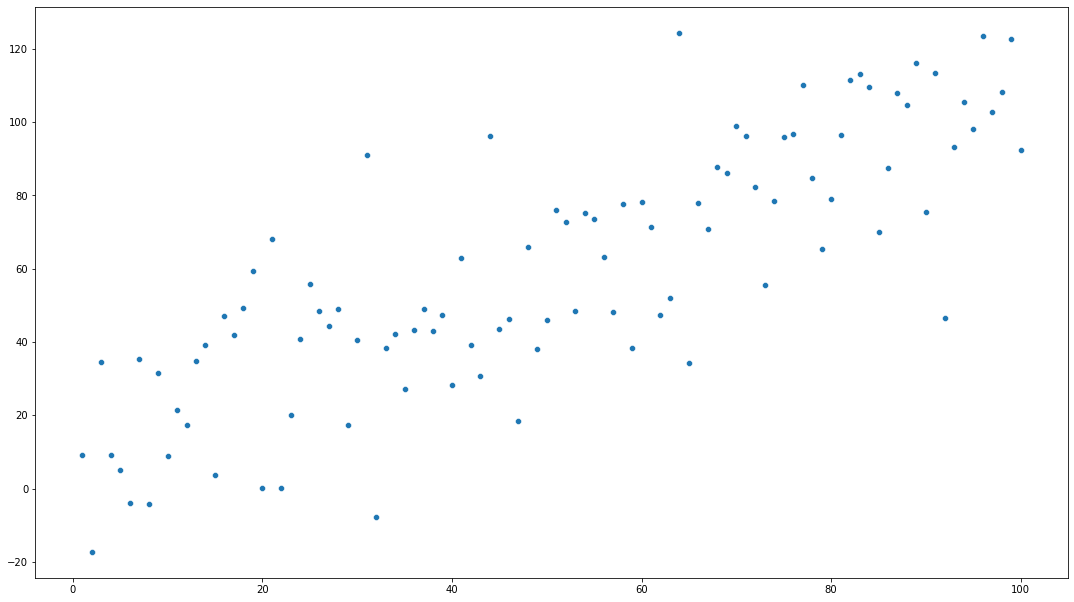

In [14]:
#prepare test data for different test and train samples

observation_count = 100
x_var = np.linspace(start = 1, stop = 100, num = observation_count)
np.random.seed(22)
y_var = x_var + np.random.normal(size = observation_count, loc = 10, scale = 20)

fig = plt.gcf().set_size_inches(18.5, 10.5)
sns.scatterplot(x = x_var, y = y_var)
x_var_2d = x_var.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(x_var_2d, y_var, test_size = .2, random_state = 22)

model = DecisionTreeRegressor(random_state=22)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print('the MAE is: ', mean_absolute_error(Y_test, predictions))
#why error? ValueError: continuous is not supported
print('the accuracy score is: ', sklearn.metrics.accuracy_score(Y_test, predictions)) 



In [11]:
Y_test.size

20